In [14]:
import pandas as pd
import numpy as np
import re
import json

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from datetime import datetime
import nltk
from nltk.stem.snowball import SnowballStemmer
from textblob import TextBlob
stemmer = SnowballStemmer('english')
stopwords = nltk.corpus.stopwords

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import mpld3
sns.set_palette('viridis')
%matplotlib notebook

In [2]:
def tokenize_and_stem(text):
    tokens = [word for word in TextBlob(text).words]
    filtered_tokens = [re.sub('[^a-zA-Z]','',w) for w in tokens]
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def error_rate(predictions, actuals):
    return np.mean(predictions != actuals)

def document_title(doc):
    if doc == 'null' or (type(doc)==float and np.isnan(doc)):
        return ''
    else:
        return json.loads(doc).get('title','')  

In [3]:
raw = pd.read_csv('data/boxer.csv')
raw['bill_title'] = raw['bill'].apply(document_title)
raw['amendment_title'] = raw['amendment'].apply(document_title)
raw['text'] = raw['question'].str.cat(raw['bill_title'],sep=' ')
raw['text'] = raw['text'].str.cat(raw['amendment_title'],sep=' ')
raw['text'] = raw['text'].apply(lambda x: re.sub("\d+", "", x))
len(raw)

5236

In [4]:
tfidf = TfidfVectorizer(max_df=0.5,min_df=2,
                        max_features=10000,
                        stop_words='english',
                        use_idf=True, tokenizer=None, ngram_range=(1,3))

In [5]:
tfidf_matrix = tfidf.fit_transform(raw['text'])
tfidf.get_feature_names()

['abduction',
 'abduction sexual',
 'abduction sexual exploitation',
 'ability',
 'ability complete',
 'ability complete assigned',
 'abortion',
 'abortion ban',
 'abortion ban act',
 'abortion decisions',
 'abortion notification',
 'abortion notification act',
 'abrams',
 'abrams georgia',
 'abrams georgia united',
 'abroad',
 'absent',
 'absent senators',
 'absent senators express',
 'abundant',
 'abundant food',
 'abundant food fiber',
 'abuse',
 'abuse heroin',
 'abuse heroin use',
 'abuse prevention',
 'abuse prevention consumer',
 'abusive',
 'abusive financial',
 'abusive financial services',
 'access',
 'access affordable',
 'access affordable pharmaceuticals',
 'access affordable reliable',
 'access affordable risk',
 'access business',
 'access business records',
 'access care',
 'access care rural',
 'access chip',
 'access chip reauthorization',
 'access health',
 'access health care',
 'access improving',
 'access improving physician',
 'access local',
 'access local telev

In [6]:
svd = TruncatedSVD(n_components=1000)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

coords = lsa.fit_transform(tfidf_matrix)
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))
    
model = KMeans(8)
clusters = model.fit_predict(coords)

reduc = TruncatedSVD(n_components=3)
xy = reduc.fit_transform(coords)

Explained variance of the SVD step: 96%


<IPython.core.display.Javascript object>


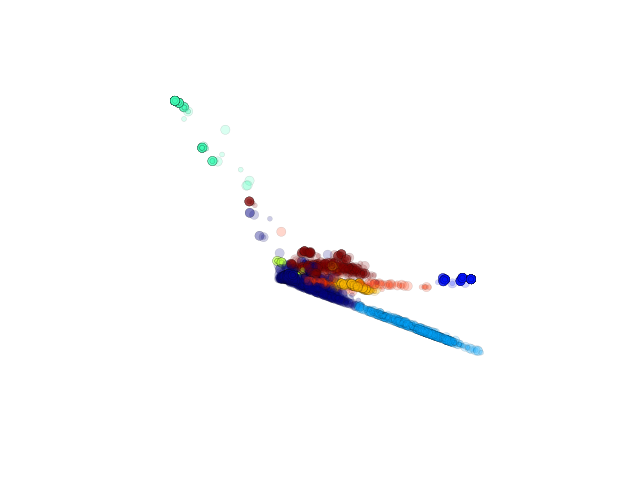

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
size = 50*(np.random.randint(0,2,len(xy)))+20
ax.scatter((xy[:,0]+2*xy[:,2]),(xy[:,1]-xy[:,2]),
           c=clusters,
           s=size,
           cmap='jet',
           alpha=0.2)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.axis('off')
html = mpld3.fig_to_html(fig)

In [30]:
np.mean(size)

20.0